<a href="https://colab.research.google.com/github/kiyer722/COVID19_data_analysis/blob/main/DataAnalysis/%EA%B9%80%EA%B0%80%EC%98%81/2020%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

전처리

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/covid19데이터마이닝/최종 데이터/2020data(mapping_ver3).csv")

In [ ]:
data.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,0,2020,3,1001496,강남 마이스 관광특구,CS300043,1.326503e+07,277,8,0,0,97662,24,15904,0,52,123,63,1
1,1,2020,3,1001496,강남 마이스 관광특구,CS300032,1.703213e+09,7224,8,0,0,97662,24,15904,0,52,123,63,1
2,2,2020,3,1001496,강남 마이스 관광특구,CS300031,8.238591e+09,5286,6,0,0,97662,24,15904,0,52,123,63,1
3,3,2020,3,1001496,강남 마이스 관광특구,CS300028,3.308578e+08,8031,6,0,0,97662,24,15904,0,52,123,63,1
4,4,2020,3,1001496,강남 마이스 관광특구,CS300027,1.913032e+09,66441,6,0,0,97662,24,15904,0,52,123,63,1


In [ ]:
data=data.drop(data.columns[[0,1,2,3,4,5]],axis='columns')
data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
0,1.326503e+07,277,8,0,0,97662,24,15904,0,52,123,63,1
1,1.703213e+09,7224,8,0,0,97662,24,15904,0,52,123,63,1
2,8.238591e+09,5286,6,0,0,97662,24,15904,0,52,123,63,1
3,3.308578e+08,8031,6,0,0,97662,24,15904,0,52,123,63,1
4,1.913032e+09,66441,6,0,0,97662,24,15904,0,52,123,63,1


In [ ]:
test=data.sample(frac=0.3,replace=False,random_state=1)
train=data.sample(frac=0.7,replace=False,random_state=7)

In [ ]:
train_data=train.drop('상권_변화_지표',axis=1)

In [ ]:
train_data.shape

(68996, 12)

In [ ]:
test.shape

(29570, 13)

In [ ]:
train_data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균
80986,506515606.0,14891,4,0,0,512445,1666,873,46,5,103,54
42738,206689882.0,2115,4,0,0,652366,1427,6267,7,69,126,64
60113,78367171.0,4029,2,0,0,876238,2312,186,11,13,100,54
68928,125589482.0,8166,6,0,0,992251,2009,224,21,43,111,50
20705,372340.0,27,1,0,2,745564,2942,207,37,20,119,51


In [ ]:
test.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,운영_영업_개월_평균,폐업_영업_개월_평균,상권_변화_지표
29881,6653714.0,115,11,0,0,1299124,4136,230,48,19,119,53,0
63964,276583890.0,31947,2,0,0,730177,2116,164,19,18,112,61,1
78600,9639562.0,223,4,0,1,995393,2667,1212,61,25,114,49,0
6337,226052170.0,23477,0,0,0,372267,227,1129,1,35,121,52,0
10711,83400746.0,1467,3,0,0,361803,1471,12418,0,42,119,58,1


머신러닝

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
target=train['상권_변화_지표']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68996 entries, 80986 to 61351
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   당월_매출_금액     68996 non-null  float64
 1   당월_매출_건수     68996 non-null  int64  
 2   점포_수         68996 non-null  int64  
 3   개업_점포_수      68996 non-null  int64  
 4   폐업_점포_수      68996 non-null  int64  
 5   총_유동인구_수     68996 non-null  int64  
 6   총 상주인구 수     68996 non-null  int64  
 7   총_직장_인구_수    68996 non-null  int64  
 8   아파트_단지_수     68996 non-null  int64  
 9   집객시설_수       68996 non-null  int64  
 10  운영_영업_개월_평균  68996 non-null  int64  
 11  폐업_영업_개월_평균  68996 non-null  int64  
 12  상권_변화_지표     68996 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.4 MB


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf=DecisionTreeClassifier(max_depth=5)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.98202899 0.98275362 0.98289855 0.98057971 0.98115942 0.98202899
 0.98246123 0.98101174 0.98115669 0.98144659]


In [ ]:
round(np.mean(score)*100,2)

98.18

In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.98       0.97898551 0.97898551 0.97956522 0.97797101 0.98028986
 0.98072184 0.97883751 0.97985215 0.97985215]


In [ ]:
round(np.mean(score)*100,2)

97.95

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.96347826 0.96869565 0.97188406 0.81043478 0.97057971 0.81666667
 0.9701406  0.96869111 0.9349181  0.91462531]


In [ ]:
round(np.mean(score)*100,2)

92.9

운영/폐업 드롭

In [ ]:
train1=train.drop(train.columns[[10,11]],axis='columns')
train1.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
80986,506515606.0,14891,4,0,0,512445,1666,873,46,5,1
42738,206689882.0,2115,4,0,0,652366,1427,6267,7,69,1
60113,78367171.0,4029,2,0,0,876238,2312,186,11,13,1
68928,125589482.0,8166,6,0,0,992251,2009,224,21,43,0
20705,372340.0,27,1,0,2,745564,2942,207,37,20,0


In [ ]:
train1_data=train_data.drop(train_data.columns[[10,11]],axis='columns')
train1_data.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수
80986,506515606.0,14891,4,0,0,512445,1666,873,46,5
42738,206689882.0,2115,4,0,0,652366,1427,6267,7,69
60113,78367171.0,4029,2,0,0,876238,2312,186,11,13
68928,125589482.0,8166,6,0,0,992251,2009,224,21,43
20705,372340.0,27,1,0,2,745564,2942,207,37,20


In [ ]:
test1=test.drop(train.columns[[10,11]],axis='columns')
test1.head()

,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
29881,6653714.0,115,11,0,0,1299124,4136,230,48,19,0
63964,276583890.0,31947,2,0,0,730177,2116,164,19,18,1
78600,9639562.0,223,4,0,1,995393,2667,1212,61,25,0
6337,226052170.0,23477,0,0,0,372267,227,1129,1,35,0
10711,83400746.0,1467,3,0,0,361803,1471,12418,0,42,1


In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train1_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8157971  0.81652174 0.82304348 0.81724638 0.81971014 0.81681159
 0.81837948 0.82258298 0.82214814 0.82751123]


In [ ]:
round(np.mean(score)*100,2)

82.0

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train1_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.80956522 0.81536232 0.81753623 0.81043478 0.8142029  0.81202899
 0.81258153 0.81895927 0.81620525 0.82127845]


In [ ]:
round(np.mean(score)*100,2)

81.48

MinMaxScaler

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.1f}".format(x)})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
X_MinMax_train = min_max_scaler.fit_transform(train1_data)

In [ ]:
X_MinMax_train

array([[0.0, 0.0, 0.0, ..., 0.0, 0.1, 0.0],
       [0.0, 0.0, 0.0, ..., 0.1, 0.0, 0.1],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.1, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.2, 0.0]])

In [ ]:
train1_new=train1_data

In [ ]:
X_MinMax_new = min_max_scaler.transform(train1_new)

In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, X_MinMax_new, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

82.0

In [ ]:
target=train1['상권_변화_지표']

In [ ]:
clf=RandomForestClassifier(n_estimators=3,max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, X_MinMax_new, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

81.51

시각화하기

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data.columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month','Answer']

In [ ]:
data.head()

,Sales amount,Sales number,stores,open store,closed store,floating population,resident population,working population,apartment,facility,Operating month,Closed month,Answer
0,1.326503e+07,277,8,0,0,97662,24,15904,0,52,123,63,1
1,1.703213e+09,7224,8,0,0,97662,24,15904,0,52,123,63,1
2,8.238591e+09,5286,6,0,0,97662,24,15904,0,52,123,63,1
3,3.308578e+08,8031,6,0,0,97662,24,15904,0,52,123,63,1
4,1.913032e+09,66441,6,0,0,97662,24,15904,0,52,123,63,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98565 entries, 0 to 98564
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales amount         98565 non-null  float64
 1   Sales number         98565 non-null  int64  
 2   stores               98565 non-null  int64  
 3   open store           98565 non-null  int64  
 4   closed store         98565 non-null  int64  
 5   floating population  98565 non-null  int64  
 6   resident population  98565 non-null  int64  
 7   working population   98565 non-null  int64  
 8   apartment            98565 non-null  int64  
 9   facility             98565 non-null  int64  
 10  Operating month      98565 non-null  int64  
 11  Closed month         98565 non-null  int64  
 12  Answer               98565 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.8 MB


In [ ]:
X=np.array(pd.DataFrame(data,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month']))

In [ ]:
y=np.array(pd.DataFrame(data,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[193835201.0, 5565.0, 16.0, ..., 4.0, 87.0, 44.0],
       [143878828.0, 10448.0, 0.0, ..., 14.0, 93.0, 57.0],
       [19087102.0, 432.0, 8.0, ..., 14.0, 113.0, 47.0],
       ...,
       [687021730.0, 4544.0, 17.0, ..., 16.0, 108.0, 53.0],
       [120088850.0, 2927.0, 3.0, ..., 29.0, 111.0, 51.0],
       [1145259011.0, 29629.0, 3.0, ..., 17.0, 143.0, 64.0]])

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep +'/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data.columns.tolist()
feature_names = feature_names[0:5]+feature_names[5:12]

In [ ]:
feature_names

['Sales amount',
 'Sales number',
 'stores',
 'open store',
 'closed store',
 'floating population',
 'resident population',
 'working population',
 'apartment',
 'facility',
 'Operating month',
 'Closed month']

In [ ]:
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 4)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

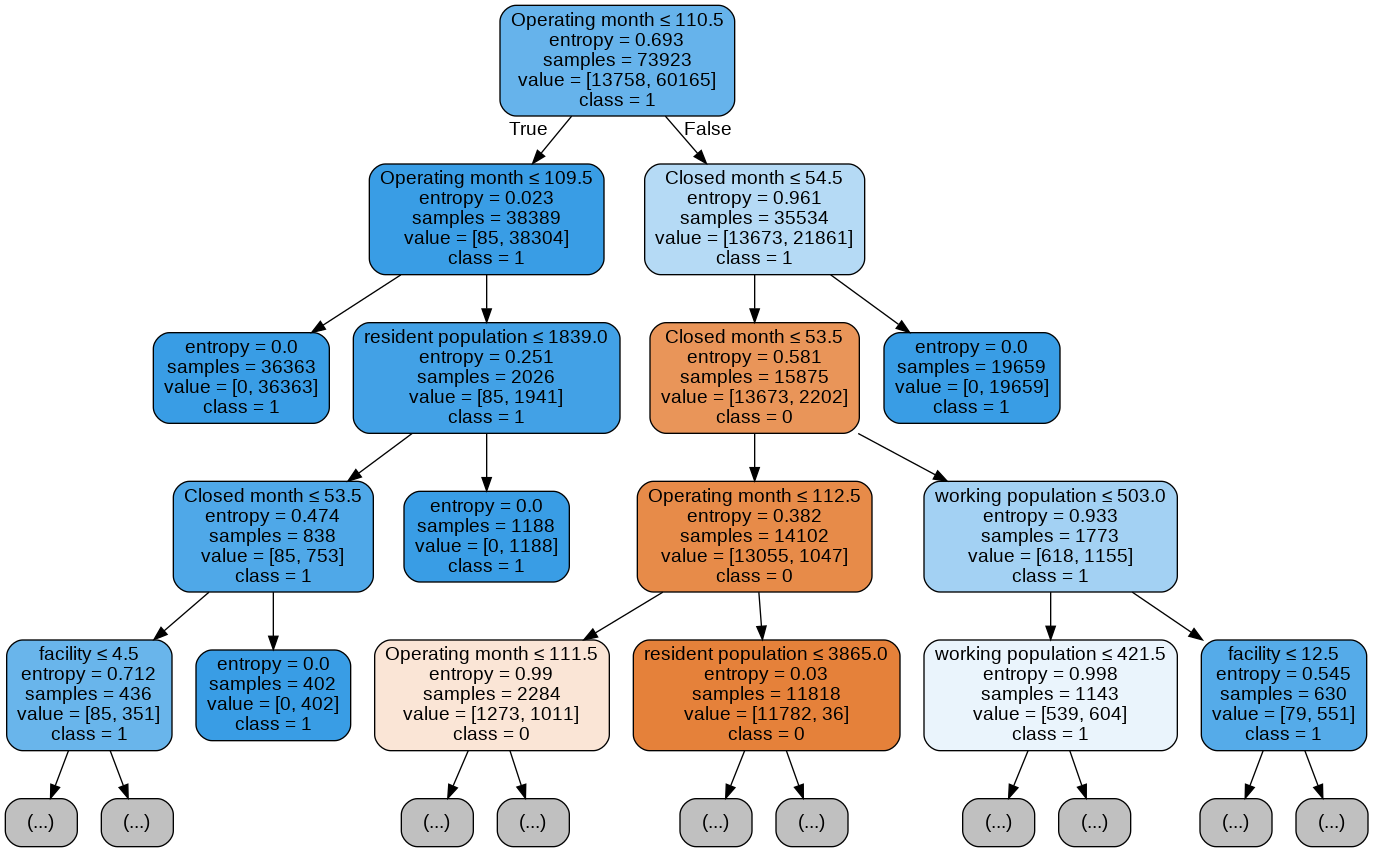

In [ ]:
Image(dt_graph.create_png())

In [ ]:
data1=data.drop(data.columns[[10,11]],axis='columns')
data1.head()

,Sales amount,Sales number,stores,open store,closed store,floating population,resident population,working population,apartment,facility,Answer
0,1.326503e+07,277,8,0,0,97662,24,15904,0,52,1
1,1.703213e+09,7224,8,0,0,97662,24,15904,0,52,1
2,8.238591e+09,5286,6,0,0,97662,24,15904,0,52,1
3,3.308578e+08,8031,6,0,0,97662,24,15904,0,52,1
4,1.913032e+09,66441,6,0,0,97662,24,15904,0,52,1


In [ ]:
target=data1['Answer']

In [ ]:
X=np.array(pd.DataFrame(data1,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility']))

In [ ]:
y=np.array(pd.DataFrame(data1,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[83261231.0, 511.0, 2.0, ..., 541.0, 72.0, 9.0],
       [36246433.0, 3874.0, 2.0, ..., 99.0, 25.0, 6.0],
       [2380259699.0, 23600.0, 11.0, ..., 14671.0, 59.0, 407.0],
       ...,
       [1530806753.0, 148341.0, 8.0, ..., 112.0, 45.0, 16.0],
       [2256619354.0, 93023.0, 47.0, ..., 380.0, 17.0, 63.0],
       [17546955.0, 247.0, 2.0, ..., 95.0, 17.0, 16.0]])

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
os.environ["PATH"] += os.pathsep +'/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data1.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_name = np.array(['0','1'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 4)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

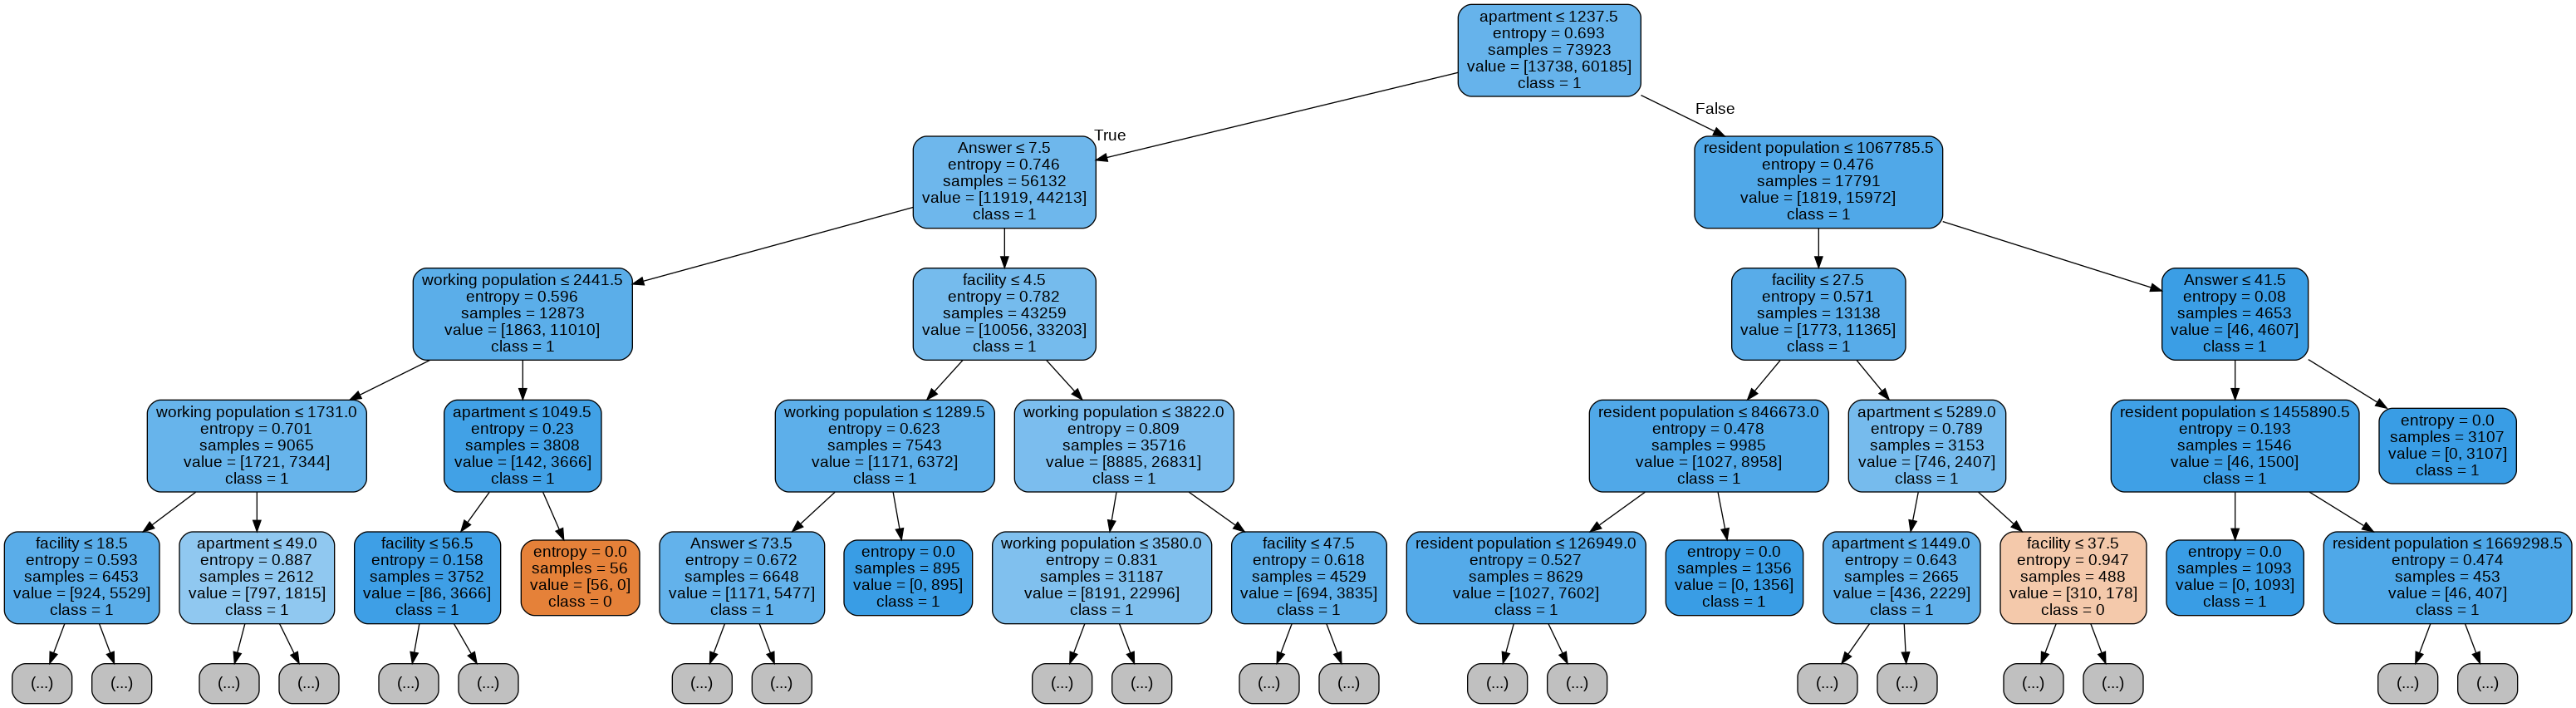

In [ ]:
Image(dt_graph.create_png())

R 시각화

In [ ]:
X=np.array(pd.DataFrame(data,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility','Operating month','Closed month']))

In [ ]:
y=np.array(pd.DataFrame(data,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[82494756.0, 2050.0, 1.0, ..., 20.0, 118.0, 53.0],
       [48720929.0, 4597.0, 4.0, ..., 11.0, 111.0, 49.0],
       [11786659.0, 523.0, 2.0, ..., 12.0, 125.0, 61.0],
       ...,
       [27153787.0, 6471.0, 0.0, ..., 33.0, 114.0, 57.0],
       [46177886.0, 402.0, 3.0, ..., 27.0, 89.0, 46.0],
       [31244952.0, 969.0, 7.0, ..., 14.0, 131.0, 66.0]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
estimator = rf_clf.estimators_[6]

In [ ]:
feature_names = data.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_names = np.array(['0', '1'])

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=4)

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)

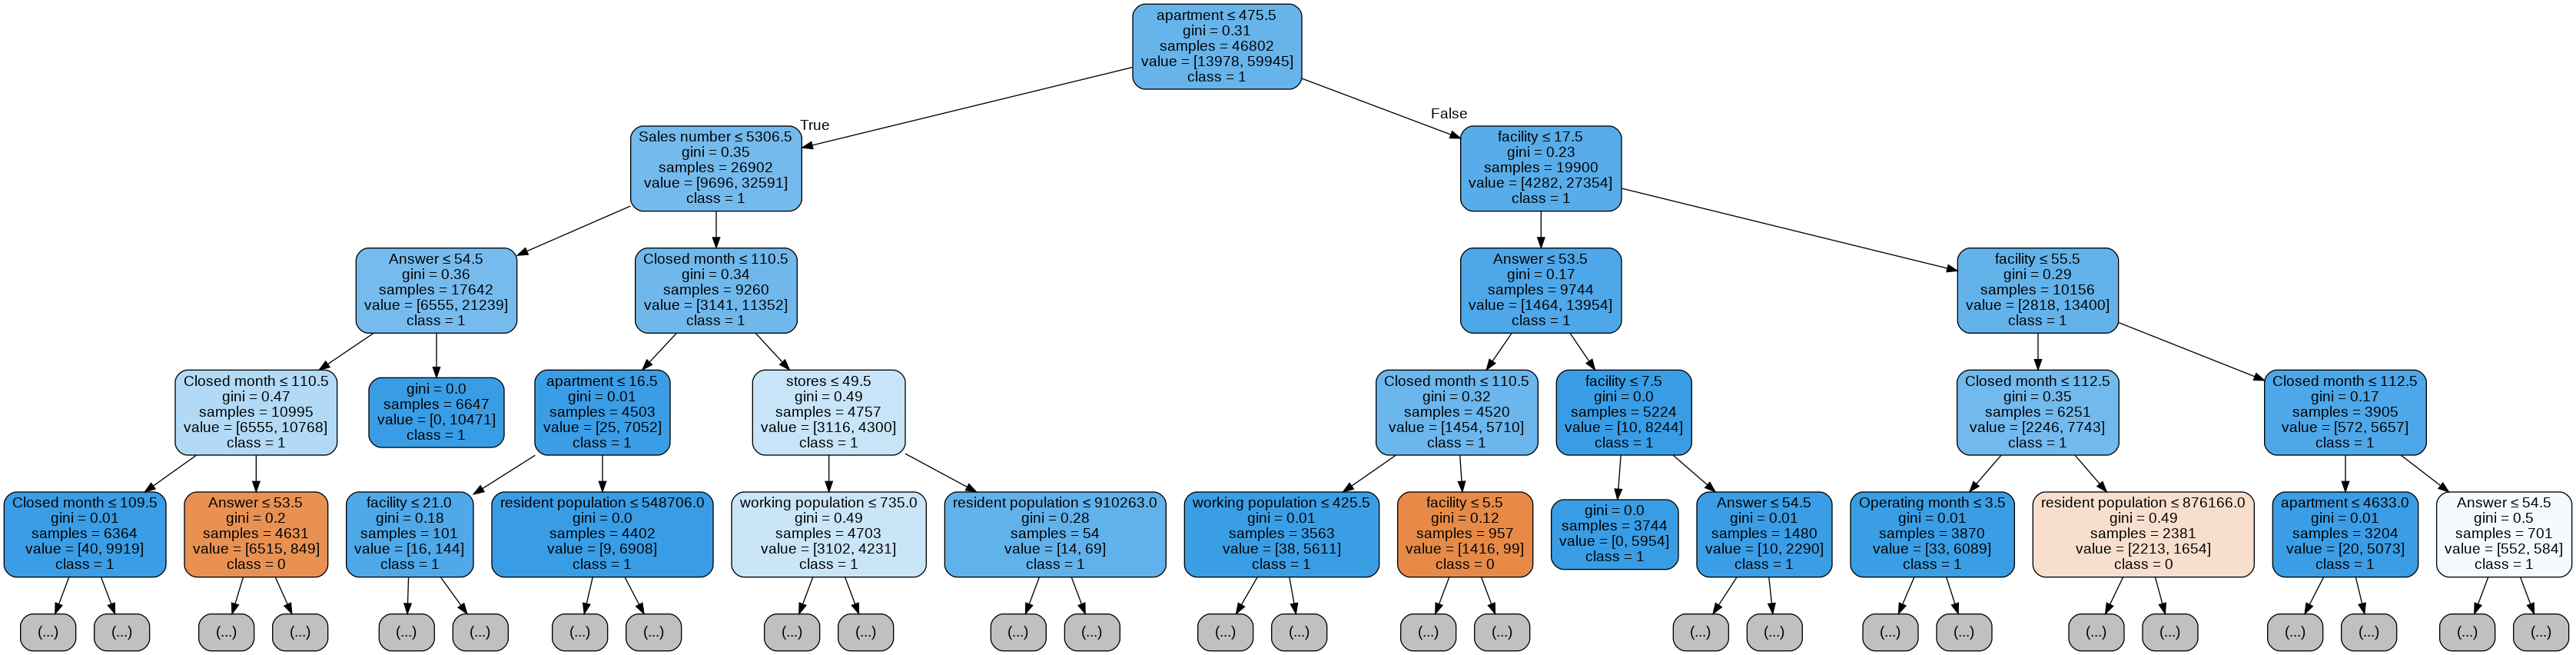

In [ ]:
Image(rf_graph.create_png())

In [ ]:
X=np.array(pd.DataFrame(data1,columns=['Sales amount','Sales number','stores','open store','closed store','floating population','resident population','working population','apartment','facility']))

In [ ]:
y=np.array(pd.DataFrame(data1,columns=['Answer']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[66772021.0, 248.0, 1.0, ..., 2098.0, 51.0, 27.0],
       [159963077.0, 282.0, 4.0, ..., 25194.0, 4.0, 63.0],
       [25509413.0, 887.0, 0.0, ..., 947.0, 54.0, 6.0],
       ...,
       [134512450.0, 5809.0, 16.0, ..., 170.0, 33.0, 14.0],
       [145994738.0, 2041.0, 4.0, ..., 748.0, 0.0, 56.0],
       [91221707.0, 969.0, 1.0, ..., 597.0, 20.0, 10.0]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
estimator = rf_clf.estimators_[6]

In [ ]:
feature_names = data1.columns.tolist()
feature_names = feature_names[0:4]+feature_names[5:]

In [ ]:
target_names = np.array(['0', '1'])

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=4)

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)

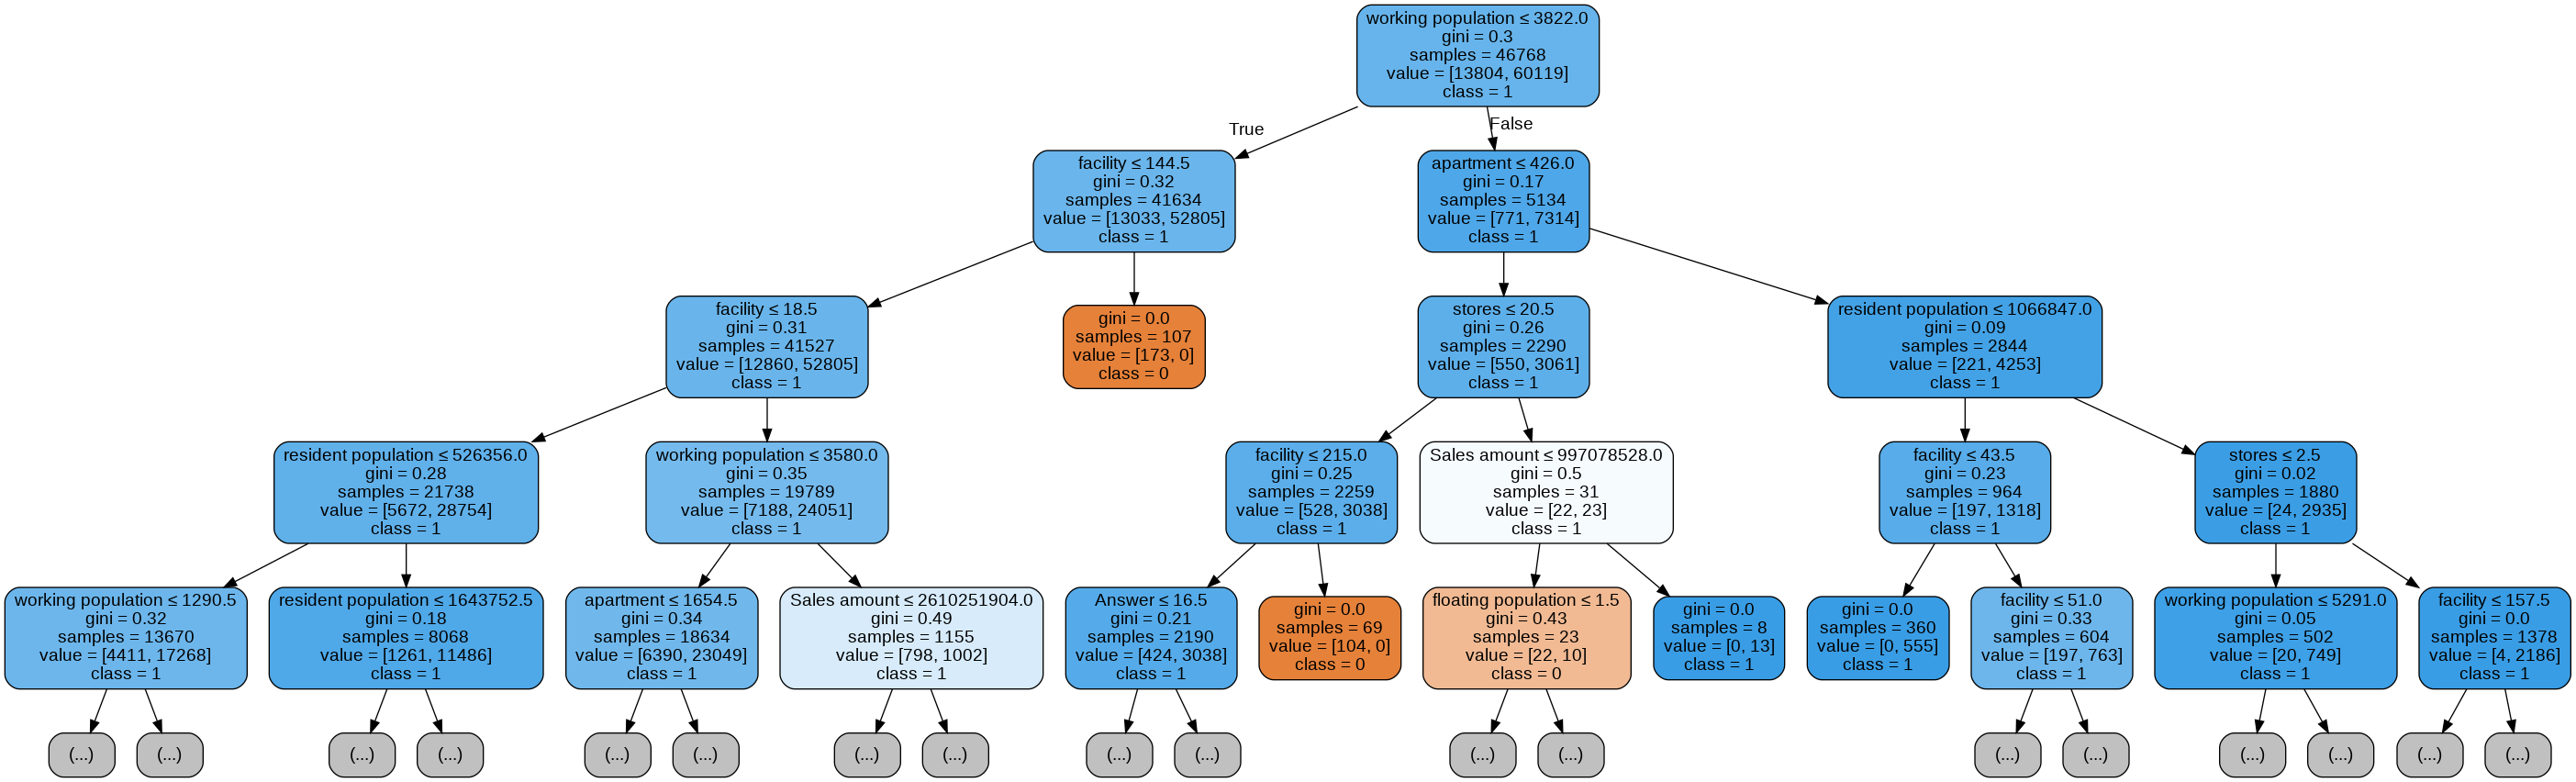

In [ ]:
Image(rf_graph.create_png())

정답률 낮추기 시도

In [ ]:
test2=test1.drop(test1.columns[[2,3,4]],axis='columns')
test2.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
29881,6653714.0,115,1299124,4136,230,48,19,0
63964,276583890.0,31947,730177,2116,164,19,18,1
78600,9639562.0,223,995393,2667,1212,61,25,0
6337,226052170.0,23477,372267,227,1129,1,35,0
10711,83400746.0,1467,361803,1471,12418,0,42,1


In [ ]:
train2=train1.drop(train1.columns[[2,3,4]],axis='columns')
train2.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수,상권_변화_지표
80986,506515606.0,14891,512445,1666,873,46,5,1
42738,206689882.0,2115,652366,1427,6267,7,69,1
60113,78367171.0,4029,876238,2312,186,11,13,1
68928,125589482.0,8166,992251,2009,224,21,43,0
20705,372340.0,27,745564,2942,207,37,20,0


In [ ]:
train2_data=train1_data.drop(train1_data.columns[[2,3,4]],axis='columns')
train2_data.head()

,당월_매출_금액,당월_매출_건수,총_유동인구_수,총 상주인구 수,총_직장_인구_수,아파트_단지_수,집객시설_수
80986,506515606.0,14891,512445,1666,873,46,5
42738,206689882.0,2115,652366,1427,6267,7,69
60113,78367171.0,4029,876238,2312,186,11,13
68928,125589482.0,8166,992251,2009,224,21,43
20705,372340.0,27,745564,2942,207,37,20


In [ ]:
target=train2['상권_변화_지표']

In [ ]:
clf=DecisionTreeClassifier(max_depth=4)
scoring='accuracy'
score=cross_val_score(clf, train2_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]


In [ ]:
round(np.mean(score)*100,2)

82.0